# Medical Insurance Cost Prediction ML Project

## Import Libraries

In [1]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [2]:
# loading the data from csv file to a Pandas Dataframe
# print first 5 rows of the dataframe
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_ec2d60ba0656445ba4ab0c771aa5f2ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vnwRz3ZFcmgsKQJ_byRrvv6-OTGEXJVuaxUCh7ds8ngN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad)

body = client_ec2d60ba0656445ba4ab0c771aa5f2ad.get_object(Bucket='projectingithub-donotdelete-pr-fxoalfetgg9jat',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

insurance_data = pd.read_csv(body)
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset came from USA, hence, charges are in USD.

In [3]:
# the number of rows and columns
insurance_data.shape

(1338, 7)

In [4]:
# getting some information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

Target Features:
- Charges

In [5]:
# Checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [6]:
# Statistical Measures of the Dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


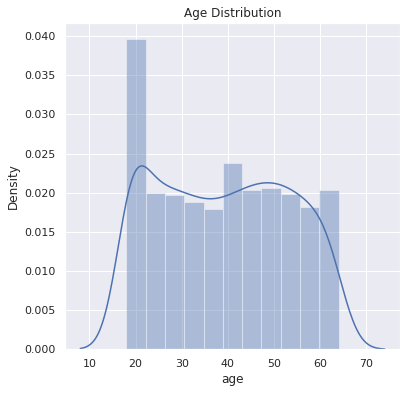

In [7]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

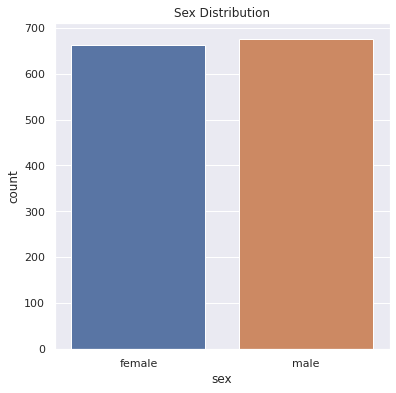

In [8]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [9]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


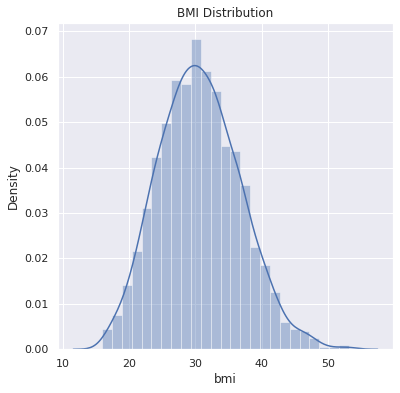

In [10]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

This is a normal distribution. There are more values around the 30 range. 

Normal BMI Range --> 18.5 to 24.9

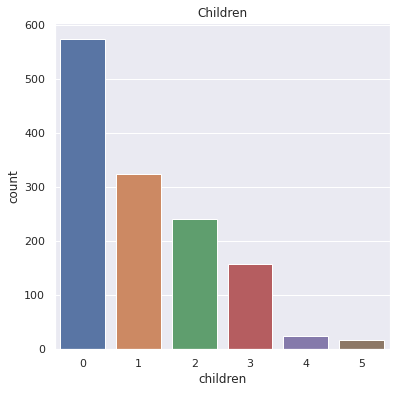

In [11]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children')
plt.show()

In [12]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

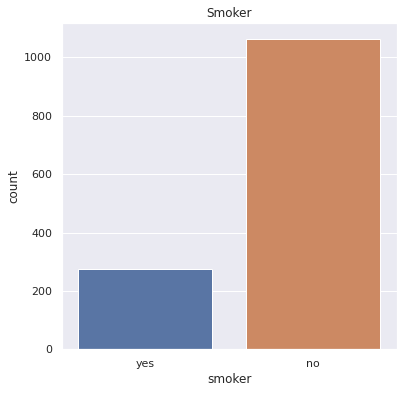

In [13]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')
plt.show()

In [14]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

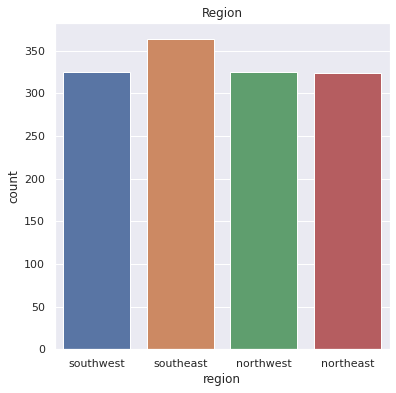

In [15]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

In [16]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


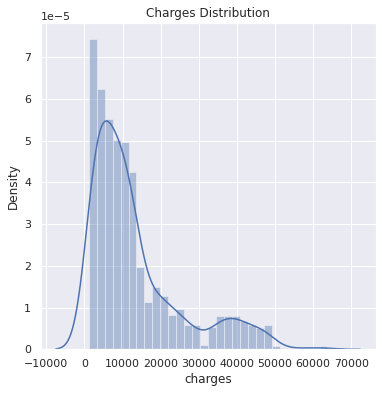

In [17]:
# Charges Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Pre-Processing

Encoding the categorical features

In [18]:
# encoding sex column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

### Splitting the features and target

In [19]:
X = insurance_data.drop(columns='charges',axis=1)
Y = insurance_data['charges']

In [20]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data and Test data.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training
Linear Regression Model

In [24]:
# loading the Linear Regression model
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [26]:
# prediction of training data
training_data_prediction = regressor.predict(X_train)

In [31]:
# R-squared value 
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [32]:
# prediction of Test data
test_data_prediction = regressor.predict(X_test)

In [33]:
# R-squared value 
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


### Build a Predictive System


In [36]:
input_data = (56, 1, 39.82, 0, 1, 0)

# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape numpy array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is USD', prediction[0])

The insurance cost is USD 14700.709537159659
